In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [4]:
df = pd.read_csv("insurance.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1340 non-null   int64  
 1   age            1335 non-null   float64
 2   gender         1340 non-null   object 
 3   bmi            1340 non-null   float64
 4   bloodpressure  1340 non-null   int64  
 5   diabetic       1340 non-null   object 
 6   children       1340 non-null   int64  
 7   smoker         1340 non-null   object 
 8   region         1337 non-null   object 
 9   claim          1340 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 104.8+ KB


In [6]:
pd.set_option("display.float_format","{:2f}".format)

In [7]:
df

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.000000,male,23.200000,91,Yes,0,No,southeast,1121.870000
1,2,24.000000,male,30.100000,87,No,0,No,southeast,1131.510000
2,3,NaN,male,33.300000,82,Yes,0,No,southeast,1135.940000
3,4,NaN,male,33.700000,80,No,0,No,northwest,1136.400000
4,5,NaN,male,34.100000,100,No,0,No,northwest,1137.010000
...,...,...,...,...,...,...,...,...,...,...
1335,1336,44.000000,female,35.500000,88,Yes,0,Yes,northwest,55135.400000
1336,1337,59.000000,female,38.100000,120,No,1,Yes,northeast,58571.070000
1337,1338,30.000000,male,34.500000,91,Yes,3,Yes,northwest,60021.400000
1338,1339,37.000000,male,30.400000,106,No,0,Yes,southeast,62592.870000


In [8]:
sns.set(style="whitegrid",palette="Set2",font_scale=1.1)

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.isna().sum()

Id               0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

In [11]:
df.dropna(inplace=True)

In [12]:
df.shape

(1332, 10)

In [13]:
df.isna().sum().sum()

np.int64(0)

In [14]:
df.describe(include="all")

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
count,1332.000000,1332.000000,1332,1332.000000,1332.000000,1332,1332.000000,1332,1332,1332.000000
unique,NaN,NaN,2,NaN,NaN,2,NaN,2,4,NaN
top,NaN,NaN,male,NaN,NaN,No,NaN,No,southeast,NaN
freq,NaN,NaN,670,NaN,NaN,695,NaN,1058,442,NaN
mean,674.474474,38.086336,NaN,30.658333,94.189189,NaN,1.099850,NaN,NaN,13325.246426
std,384.703785,11.112804,NaN,6.118967,11.445173,NaN,1.205958,NaN,NaN,12109.620712
min,1.000000,18.000000,NaN,16.000000,80.000000,NaN,0.000000,NaN,NaN,1121.870000
25%,341.750000,29.000000,NaN,26.200000,86.000000,NaN,0.000000,NaN,NaN,4760.157500
50%,674.500000,38.000000,NaN,30.350000,92.000000,NaN,1.000000,NaN,NaN,9412.965000
75%,1007.250000,47.000000,NaN,34.725000,99.000000,NaN,2.000000,NaN,NaN,16781.327500


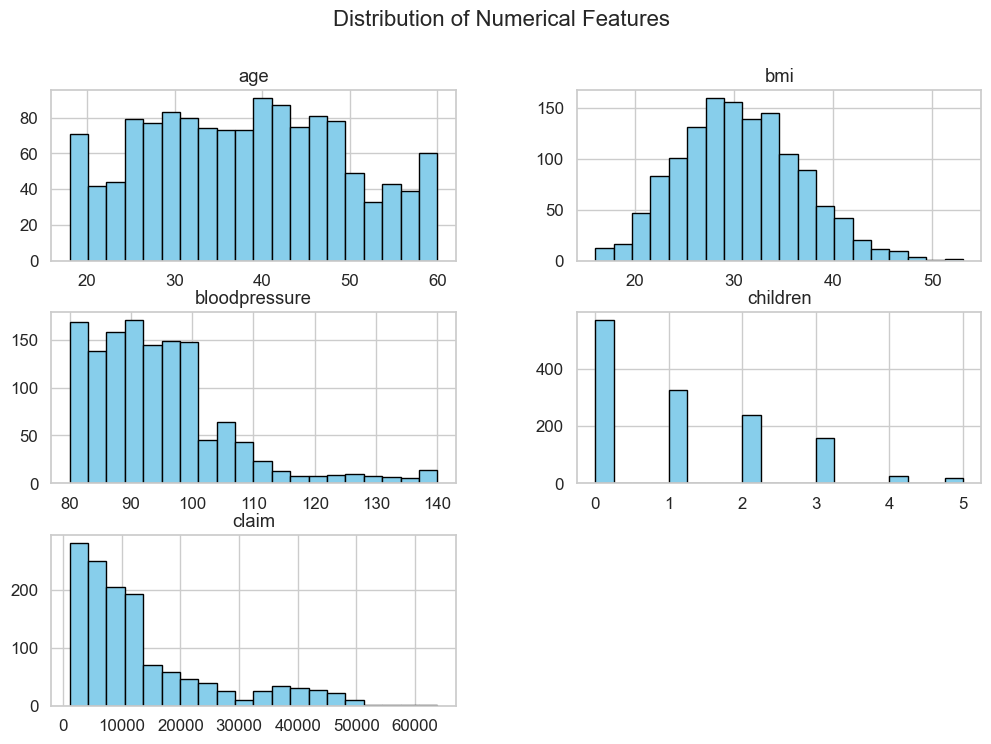

In [15]:
numeric_cols=["age","bmi","bloodpressure","children","claim"]
df[numeric_cols].hist(bins=20,figsize=(12,8),color="skyblue",edgecolor="black")
plt.suptitle("Distribution of Numerical Features",fontsize=16)
plt.show()

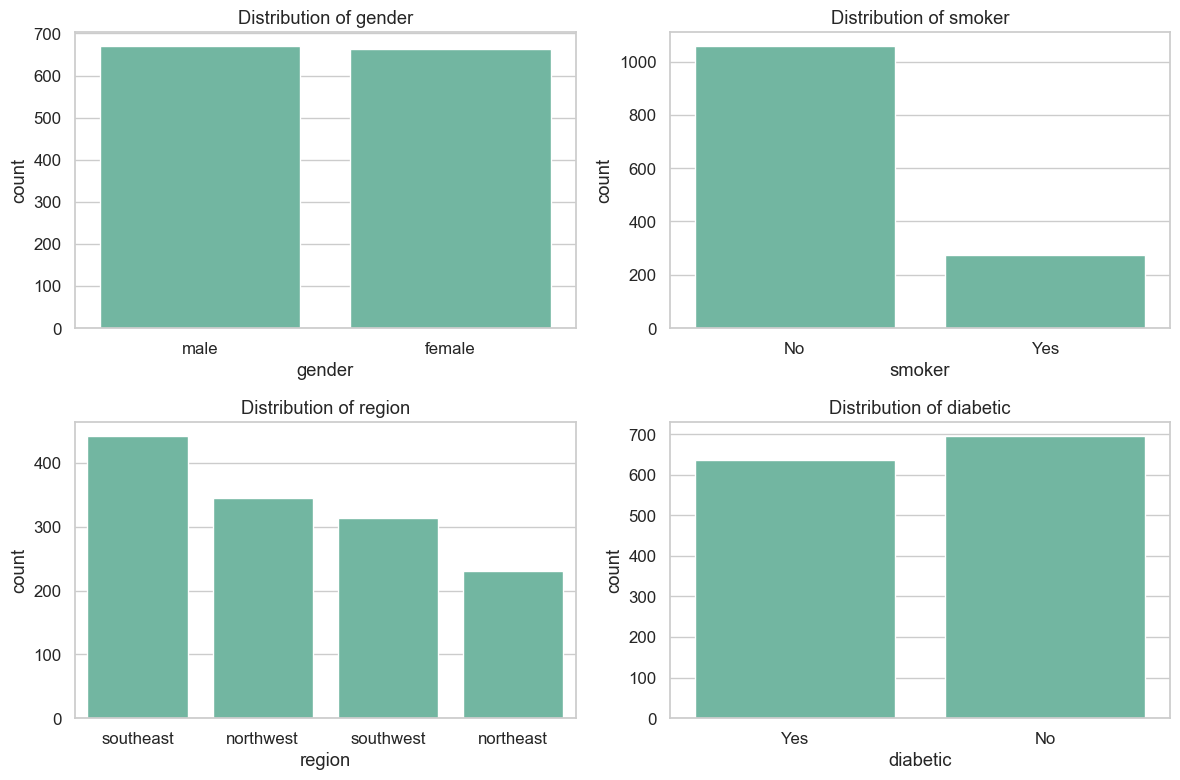

In [16]:
cat_cols=["gender","smoker","region","diabetic"]
plt.figure(figsize=(12,8))
for i, col, in enumerate(cat_cols,1):
    plt.subplot(2,2,i)
    sns.countplot(data=df,x=col)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

In [17]:
df.groupby(["gender","smoker"])["claim"].mean().round(2)

gender  smoker
female  No        8762.300000
        Yes      30679.000000
male    No        8169.250000
        Yes      33042.010000
Name: claim, dtype: float64

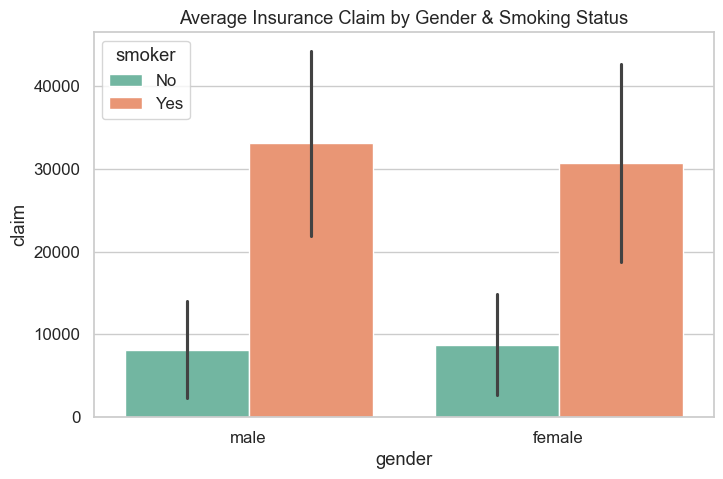

In [18]:
plt.figure(figsize=(8,5))
sns.barplot(data=df,x="gender",y="claim",hue="smoker",estimator="mean",errorbar="sd")
plt.title("Average Insurance Claim by Gender & Smoking Status")
plt.show()

In [19]:
pivot_region_deabetic=df.groupby(["region","diabetic"])["claim"].mean().unstack()
pivot_region_deabetic

diabetic,No,Yes
region,,
northeast,16966.861455,16818.302231
northwest,11442.831842,12224.958000
southeast,13578.717200,12574.093226
southwest,13069.907824,12313.739167


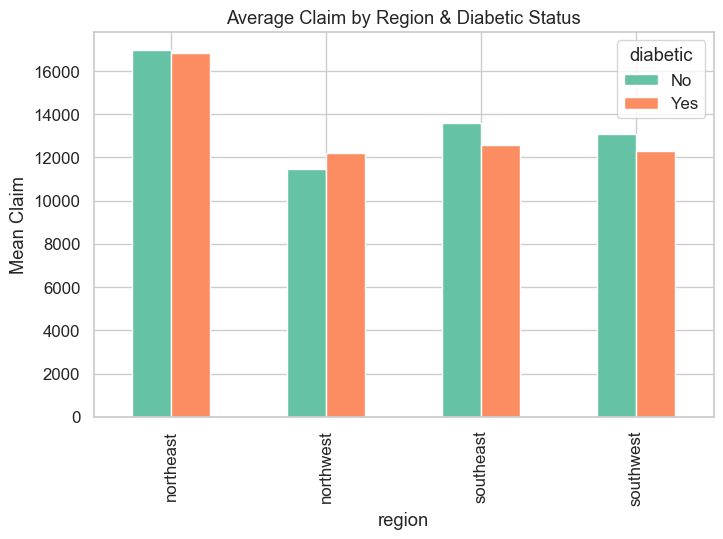

In [20]:
pivot_region_deabetic.plot(kind="bar",figsize=(8,5))
plt.title("Average Claim by Region & Diabetic Status")
plt.ylabel("Mean Claim")
plt.show()

In [21]:
pivot_table=pd.pivot_table(df,values="claim",index="region",columns="smoker",aggfunc="mean")
pivot_table

smoker,No,Yes
region,,
northeast,11666.112195,29673.536269
northwest,8076.203415,30192.002759
southeast,7444.144872,34844.997253
southwest,8294.754102,32269.064138


In [22]:
pivot_table=pd.pivot_table(df,values="claim",index="children",columns="diabetic",aggfunc="mean")
pivot_table

diabetic,No,Yes
children,,
0,12967.395398,11985.289857
1,12730.455810,12732.055724
2,15567.767583,14579.360417
3,13807.612892,17091.258649
4,14106.630000,13573.352500
5,8519.043636,9205.594286


In [23]:
df[numeric_cols]

,age,bmi,bloodpressure,children,claim
0,39.000000,23.200000,91,0,1121.870000
1,24.000000,30.100000,87,0,1131.510000
7,19.000000,41.100000,100,0,1146.800000
8,20.000000,43.000000,86,0,1149.400000
9,30.000000,53.100000,97,0,1163.460000
...,...,...,...,...,...
1335,44.000000,35.500000,88,0,55135.400000
1336,59.000000,38.100000,120,1,58571.070000
1337,30.000000,34.500000,91,3,60021.400000
1338,37.000000,30.400000,106,0,62592.870000


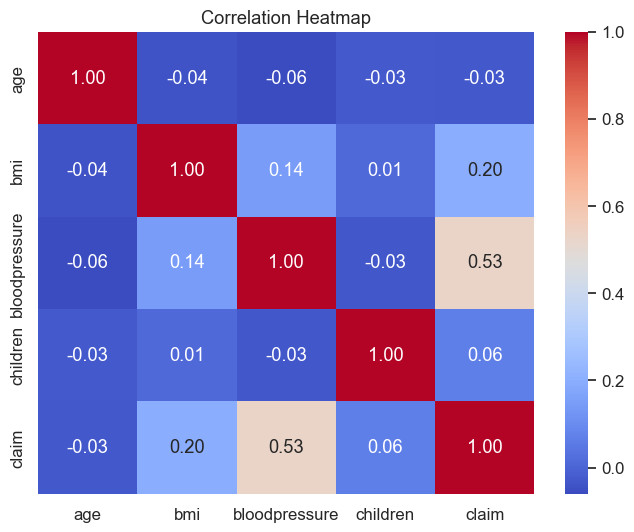

In [24]:
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr() , annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

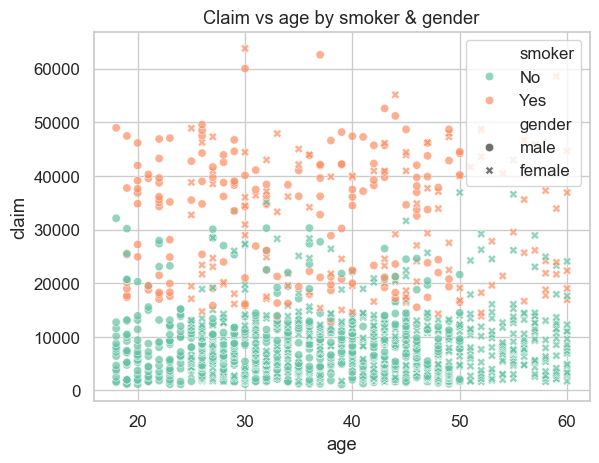

In [25]:
sns.scatterplot(data=df,x="age",y="claim",hue="smoker",style="gender",alpha=0.7)
plt.title("Claim vs age by smoker & gender")
plt.show()

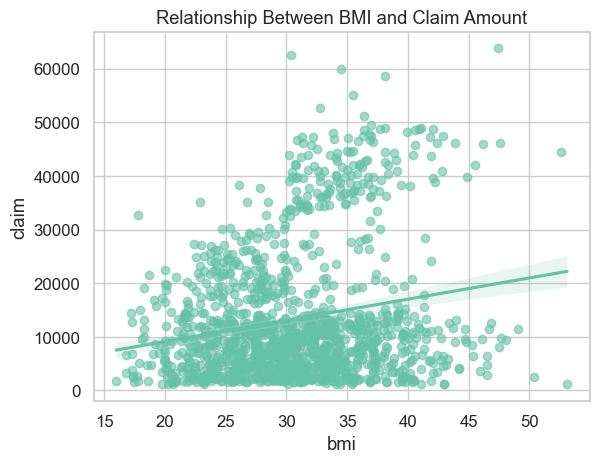

In [26]:
sns.regplot(data=df,x="bmi",y="claim",scatter_kws={"alpha":0.6})
plt.title("Relationship Between BMI and Claim Amount")
plt.show()

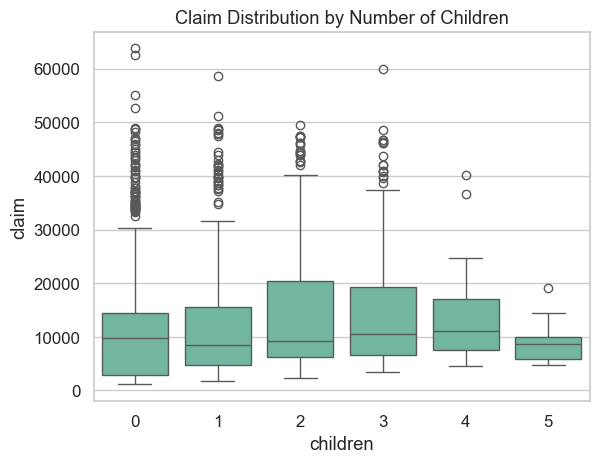

In [27]:
sns.boxplot(data=df,x="children",y="claim")
plt.title("Claim Distribution by Number of Children")
plt.show()

In [28]:
df['age_group'] = pd.cut(df["age"],bins=[0,18,30,45,60,100],labels=["<18","18-30","31-45","46-60","60+"])

In [29]:
df

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,age_group
0,1,39.000000,male,23.200000,91,Yes,0,No,southeast,1121.870000,31-45
1,2,24.000000,male,30.100000,87,No,0,No,southeast,1131.510000,18-30
7,8,19.000000,male,41.100000,100,No,0,No,northwest,1146.800000,18-30
8,9,20.000000,male,43.000000,86,No,0,No,northwest,1149.400000,18-30
9,10,30.000000,male,53.100000,97,No,0,No,northwest,1163.460000,18-30
...,...,...,...,...,...,...,...,...,...,...,...
1335,1336,44.000000,female,35.500000,88,Yes,0,Yes,northwest,55135.400000,31-45
1336,1337,59.000000,female,38.100000,120,No,1,Yes,northeast,58571.070000,46-60
1337,1338,30.000000,male,34.500000,91,Yes,3,Yes,northwest,60021.400000,18-30
1338,1339,37.000000,male,30.400000,106,No,0,Yes,southeast,62592.870000,31-45


In [30]:
df['age_group'].value_counts()

age_group
31-45    553
46-60    383
18-30    380
<18       16
60+        0
Name: count, dtype: int64

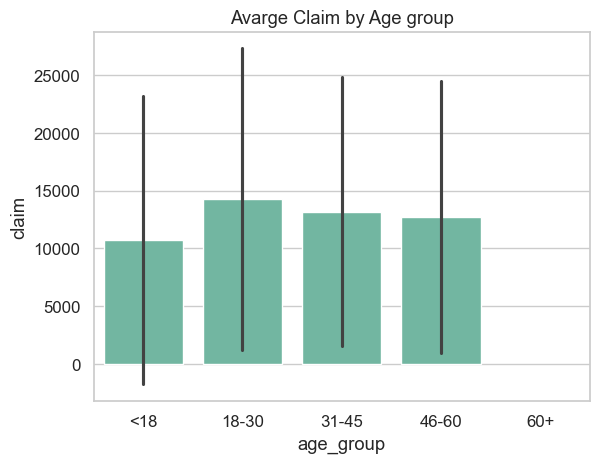

In [31]:
sns.barplot(data=df,x="age_group",y="claim",estimator="mean",errorbar="sd")
plt.title("Avarge Claim by Age group")
plt.show()

In [32]:
df["bmi_category"]=pd.cut(df["bmi"],bins=[0,18.5,24.9,29.9,100],labels=["Underweight",'Normal',"Overweight","Obese"])


In [33]:
df["bmi_category"].value_counts()

bmi_category
Obese          702
Overweight     387
Normal         222
Underweight     21
Name: count, dtype: int64

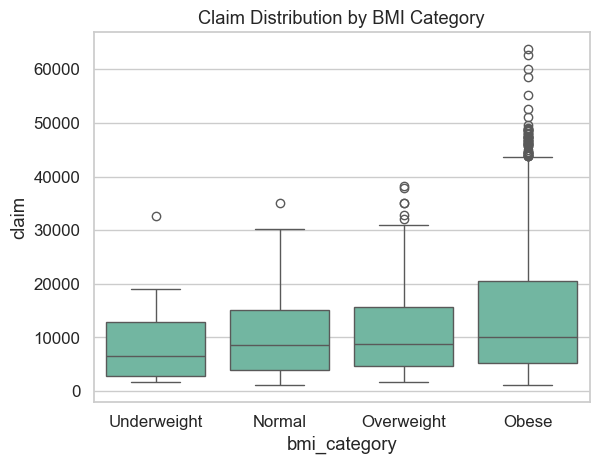

In [34]:
sns.boxplot(data=df,x='bmi_category',y='claim')
plt.title("Claim Distribution by BMI Category")
plt.show()

In [35]:
region_stats=df.groupby("region").agg(
    smoker_rate=("smoker",lambda x: (x=='Yes').mean() * 100),
    mean_claim=("claim","mean")
).reset_index()

In [36]:
region_stats

,region,smoker_rate,mean_claim
0,northeast,29.004329,16889.044719
1,northwest,16.811594,11794.221855
2,southeast,20.588235,13085.496833
3,southwest,18.471338,12723.129841


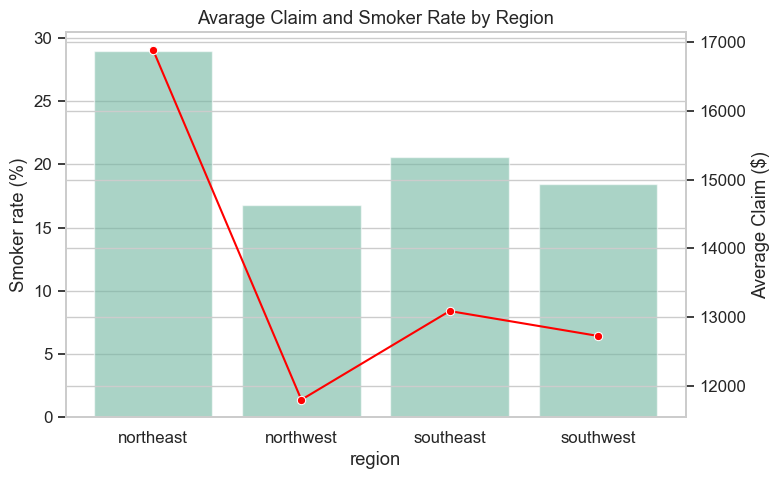

In [37]:
fig,ax1=plt.subplots(figsize=(8,5))
sns.barplot(data=region_stats, x="region", y='smoker_rate',ax=ax1,alpha=0.6)
ax2=ax1.twinx()
sns.lineplot(data=region_stats, x="region", y="mean_claim", ax=ax2, color="red",marker="o")
ax1.set_ylabel("Smoker rate (%)")
ax2.set_ylabel("Average Claim ($)")
plt.title('Avarage Claim and Smoker Rate by Region')
plt.show()

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib

In [39]:
df.columns

Index(['Id', 'age', 'gender', 'bmi', 'bloodpressure', 'diabetic', 'children',
       'smoker', 'region', 'claim', 'age_group', 'bmi_category'],
      dtype='object')

In [40]:
X=df[["age",'gender',"bmi","bloodpressure","diabetic","children","smoker"]]
y=df["claim"]


In [41]:
X

,age,gender,bmi,bloodpressure,diabetic,children,smoker
0,39.000000,male,23.200000,91,Yes,0,No
1,24.000000,male,30.100000,87,No,0,No
7,19.000000,male,41.100000,100,No,0,No
8,20.000000,male,43.000000,86,No,0,No
9,30.000000,male,53.100000,97,No,0,No
...,...,...,...,...,...,...,...
1335,44.000000,female,35.500000,88,Yes,0,Yes
1336,59.000000,female,38.100000,120,No,1,Yes
1337,30.000000,male,34.500000,91,Yes,3,Yes
1338,37.000000,male,30.400000,106,No,0,Yes


In [42]:
cat_cols=["gender","diabetic","smoker"]
label_encoders={}

In [43]:
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col]=le
    joblib.dump(le,f"label_encoder_{col}.pkl")

C:\Users\HP\AppData\Local\Temp\ipykernel_20020\1145140272.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
C:\Users\HP\AppData\Local\Temp\ipykernel_20020\1145140272.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
C:\Users\HP\AppData\Local\Temp\ipykernel_20020\1145140272.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [44]:
X

,age,gender,bmi,bloodpressure,diabetic,children,smoker
0,39.000000,1,23.200000,91,1,0,0
1,24.000000,1,30.100000,87,0,0,0
7,19.000000,1,41.100000,100,0,0,0
8,20.000000,1,43.000000,86,0,0,0
9,30.000000,1,53.100000,97,0,0,0
...,...,...,...,...,...,...,...
1335,44.000000,0,35.500000,88,1,0,1
1336,59.000000,0,38.100000,120,0,1,1
1337,30.000000,1,34.500000,91,1,3,1
1338,37.000000,1,30.400000,106,0,0,1


In [45]:
label_encoders

{'gender': LabelEncoder(),
 'diabetic': LabelEncoder(),
 'smoker': LabelEncoder()}

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [47]:
num_cols=["age","bmi","bloodpressure","children"]
scaler=StandardScaler()

In [48]:
X_train[num_cols]=scaler.fit_transform(X_train[num_cols])
X_test[num_cols]=scaler.transform(X_test[num_cols])

In [49]:
joblib.dump(scaler,"scaler.pkl")


['scaler.pkl']

In [50]:
print(X_train.shape,y_train.shape)

(1065, 7) (1065,)


In [51]:
print(X_test.shape,y_test.shape)

(267, 7) (267,)


In [52]:
!pip install xgboost



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
import numpy as np


In [54]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return {'R2': r2, 'MAE': mae, 'RMSE': rmse}


In [55]:
results={}

In [59]:
lr = LinearRegression()
lr.fit(X_train, y_train)
results["Linear Regression"] = evaluate_model(lr, X_train, y_train, X_test, y_test)
print("Linear Regression model trained successfully.")

best_poly_model = None
best_poly_score = -np.inf

for degree in [2, 3]:
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    poly_lr = LinearRegression()
    poly_lr.fit(X_train_poly, y_train)
    score = poly_lr.score(X_test_poly, y_test)
    if score > best_poly_score:
        best_poly_score = score
        best_poly_model = (degree, poly, poly_lr)

degree, poly, poly_lr = best_poly_model
results[f"Polynomial Regression (deg={degree})"] = evaluate_model(
    poly_lr,
    poly.fit_transform(X_train),
    y_train,
    poly.transform(X_test),
    y_test
)
print(f"Polynomial Regression model (degree={degree}) trained successfully.")

rf = RandomForestRegressor(random_state=42)
rf_params = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}
rf_grid = GridSearchCV(rf, rf_params, cv=3, scoring="r2", n_jobs=-1, verbose=0)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_
results["Random Forest"] = evaluate_model(best_rf, X_train, y_train, X_test, y_test)
print("Random Forest training completed.")
print("Best Parameters:", rf_grid.best_params_)

svr = SVR()
svr_params = {
    "kernel": ["rbf", "poly", "linear"],
    "C": [1, 10, 50],
    "epsilon": [0.1, 0.2, 0.5],
    "degree": [2, 3]
}
svr_grid = GridSearchCV(svr, svr_params, cv=3, scoring="r2", n_jobs=-1, verbose=0)
svr_grid.fit(X_train, y_train)
best_svr = svr_grid.best_estimator_
results["SVR"] = evaluate_model(best_svr, X_train, y_train, X_test, y_test)
print("SVR training completed.")
print("Best Parameters:", svr_grid.best_params_)

xgb = XGBRegressor(objective="reg:squarederror", random_state=42)
xgb_params = {
    "n_estimators": [100, 200],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.8, 1.0]
}
xgb_grid = GridSearchCV(xgb, xgb_params, cv=3, scoring="r2", n_jobs=-1, verbose=0)
xgb_grid.fit(X_train, y_train)
best_xgb = xgb_grid.best_estimator_
results["XGBoost"] = evaluate_model(best_xgb, X_train, y_train, X_test, y_test)
print("XGBoost training completed.")
print("Best Parameters:", xgb_grid.best_params_)

Linear Regression model trained successfully.
Polynomial Regression model (degree=2) trained successfully.
Random Forest training completed.
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
SVR training completed.
Best Parameters: {'C': 50, 'degree': 2, 'epsilon': 0.1, 'kernel': 'linear'}
XGBoost training completed.
Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


In [60]:
results

{'Linear Regression': {'R2': 0.6714439704865338,
  'MAE': np.float64(5346.216388901857),
  'RMSE': np.float64(7124.3954604033825)},
 'Polynomial Regression (deg=2)': {'R2': 0.7314295816046441,
  'MAE': np.float64(4823.640930843282),
  'RMSE': np.float64(6441.283072251954)},
 'Random Forest': {'R2': 0.7718123913356839,
  'MAE': np.float64(4426.2493208660635),
  'RMSE': np.float64(5937.304545525037)},
 'SVR': {'R2': 0.49866397708054355,
  'MAE': np.float64(5917.996750648153),
  'RMSE': np.float64(8800.508225428452)},
 'XGBoost': {'R2': 0.7787589639118302,
  'MAE': np.float64(4411.148746635065),
  'RMSE': np.float64(5846.233258745346)}}

In [62]:
results_df=pd.DataFrame(results).T.sort_values(by="R2",ascending=False)
results_df

,R2,MAE,RMSE
XGBoost,0.778759,4411.148747,5846.233259
Random Forest,0.771812,4426.249321,5937.304546
Polynomial Regression (deg=2),0.731430,4823.640931,6441.283072
Linear Regression,0.671444,5346.216389,7124.395460
SVR,0.498664,5917.996751,8800.508225


In [64]:
models={
    "Linear Regression":lr,
    "Polynomial Regression":poly_lr,
    "Random Forest":best_rf,
    "SVR":best_svr,
    'XGBoost':best_xgb
}

In [65]:
best_r2=results_df["R2"].max()

In [66]:
best_r2

np.float64(0.7787589639118302)

In [67]:
top_model=results_df[results_df["R2"]==best_r2]


In [68]:
top_model

,R2,MAE,RMSE
XGBoost,0.778759,4411.148747,5846.233259


In [69]:
best_model=models[top_model.index[0]]

In [70]:
best_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [73]:
joblib.dump(best_model,"best_model.pkl")
print(f"Best model selected : {top_model.index[0]}")

Best model selected : XGBoost
